In [126]:
import pandas as pd
import numpy as np

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [129]:
df = pd.read_excel("NH_ProviderInfo_Sep2021.xlsx","Analysis")

In [130]:
df

Index  Federal Provider Number  \
0          1                   676446   
1          2                   345428   
2          3                   455798   
3          4                   676285   
4          5                   475049   
...      ...                      ...   
11646  11649                   145895   
11647  11650                   675067   
11648  11651                   315077   
11649  11652                    35231   
11650  11653                   135092   

                                       Provider Name        Provider Address  \
0       MISSION VALLEY NURSING AND TRANSITIONAL CARE         1200 S BRYAN RD   
1                           THE LAURELS OF SALISBURY          215 LASH DRIVE   
2                  BEDFORD WELLNESS & REHABILITATION    2001 FOREST RIDGE DR   
3                REMARKABLE HEALTHCARE OF FORT WORTH     6649 N RIVERSIDE DR   
4                                    BEL AIRE CENTER       35 BEL-AIRE DRIVE   
...                                              ...                     ...   
11646                      STEPHENSON NURSING CENTER  2946 SOUTH WALNUT ROAD   
11647                GAINESVILLE CONVALESCENT CENTER          1900 O'NEAL ST   
11648  WILLOWBROOKE COURT SKILLED CARE AT EVERGREENS     309 BRIDGEBORO ROAD   
11649                                   SIERRA WINDS    17300 NORTH 88TH AVE   
11650   GOOD SAMARITAN SOCIETY - IDAHO FALLS VILLAGE    840 EAST ELVA STREET   

      Provider City Provider State  Provider Zip Code  Provider Phone Number  \
0           MISSION             TX              78572             8556878282   
1         SALISBURY             NC              28147             7046371182   
2           BEDFORD             TX              76021             8175716804   
3        FORT WORTH             TX              76137             8178471860   
4           NEWPORT             VT               5855             8023342878   
...             ...            ...                ...                    ...   
11646      FREEPORT             IL              61032             8152356173   
11647   GAINESVILLE             TX              76240             9406652826   
11648    MOORESTOWN             NJ               8057             8564392000   
11649        PEORIA             AZ              85382             6239720212   
11650   IDAHO FALLS             ID              83401             2085234795   

       Provider SSA County Code Provider County Name  ... Fine per bed  \
0                           650              Hidalgo  ...     0.000000   
1                           790                Rowan  ...   227.116667   
2                           910              Tarrant  ...     0.000000   
3                           910              Tarrant  ...     0.000000   
4                            90              Orleans  ...   166.931818   
...                         ...                  ...  ...          ...   
11646                       970           Stephenson  ...   142.236486   
11647                       340                Cooke  ...    73.732143   
11648                       150           Burlington  ...     0.000000   
11649                        60             Maricopa  ...     0.000000   
11650                        90           Bonneville  ...   737.840708   

       Fine per avg bed  Number of Payment Denials  Total Number of Penalties  \
0              0.000000                          0                          0   
1            198.644315                          0                          1   
2              0.000000                          0                          0   
3              0.000000                          1                          1   
4            148.684211                          0                          1   
...                 ...                        ...                        ...   
11646        579.917355                          1                          4   
11647        312.803030                          0     

In [131]:
df.columns

Index(['Index', 'Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Occupancy Rate',
       'Occupancy-Average', 'State Avg', 'OccupancyRate-Avg State',
       'Provider Type', 'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services', 'Year',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Short-Stay QM Rating', 'S

In [135]:
df['Age'] = 2021 - df['Year']
df.replace("N",0,inplace=True)
df.replace("Y",1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11651 entries, 0 to 11650
Data columns (total 59 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Index                                                          11651 non-null  int64         
 1   Federal Provider Number                                        11651 non-null  int64         
 2   Provider Name                                                  11651 non-null  object        
 3   Provider Address                                               11651 non-null  object        
 4   Provider City                                                  11651 non-null  object        
 5   Provider State                                                 11651 non-null  object        
 6   Provider Zip Code                                              11651 non-null  int64         


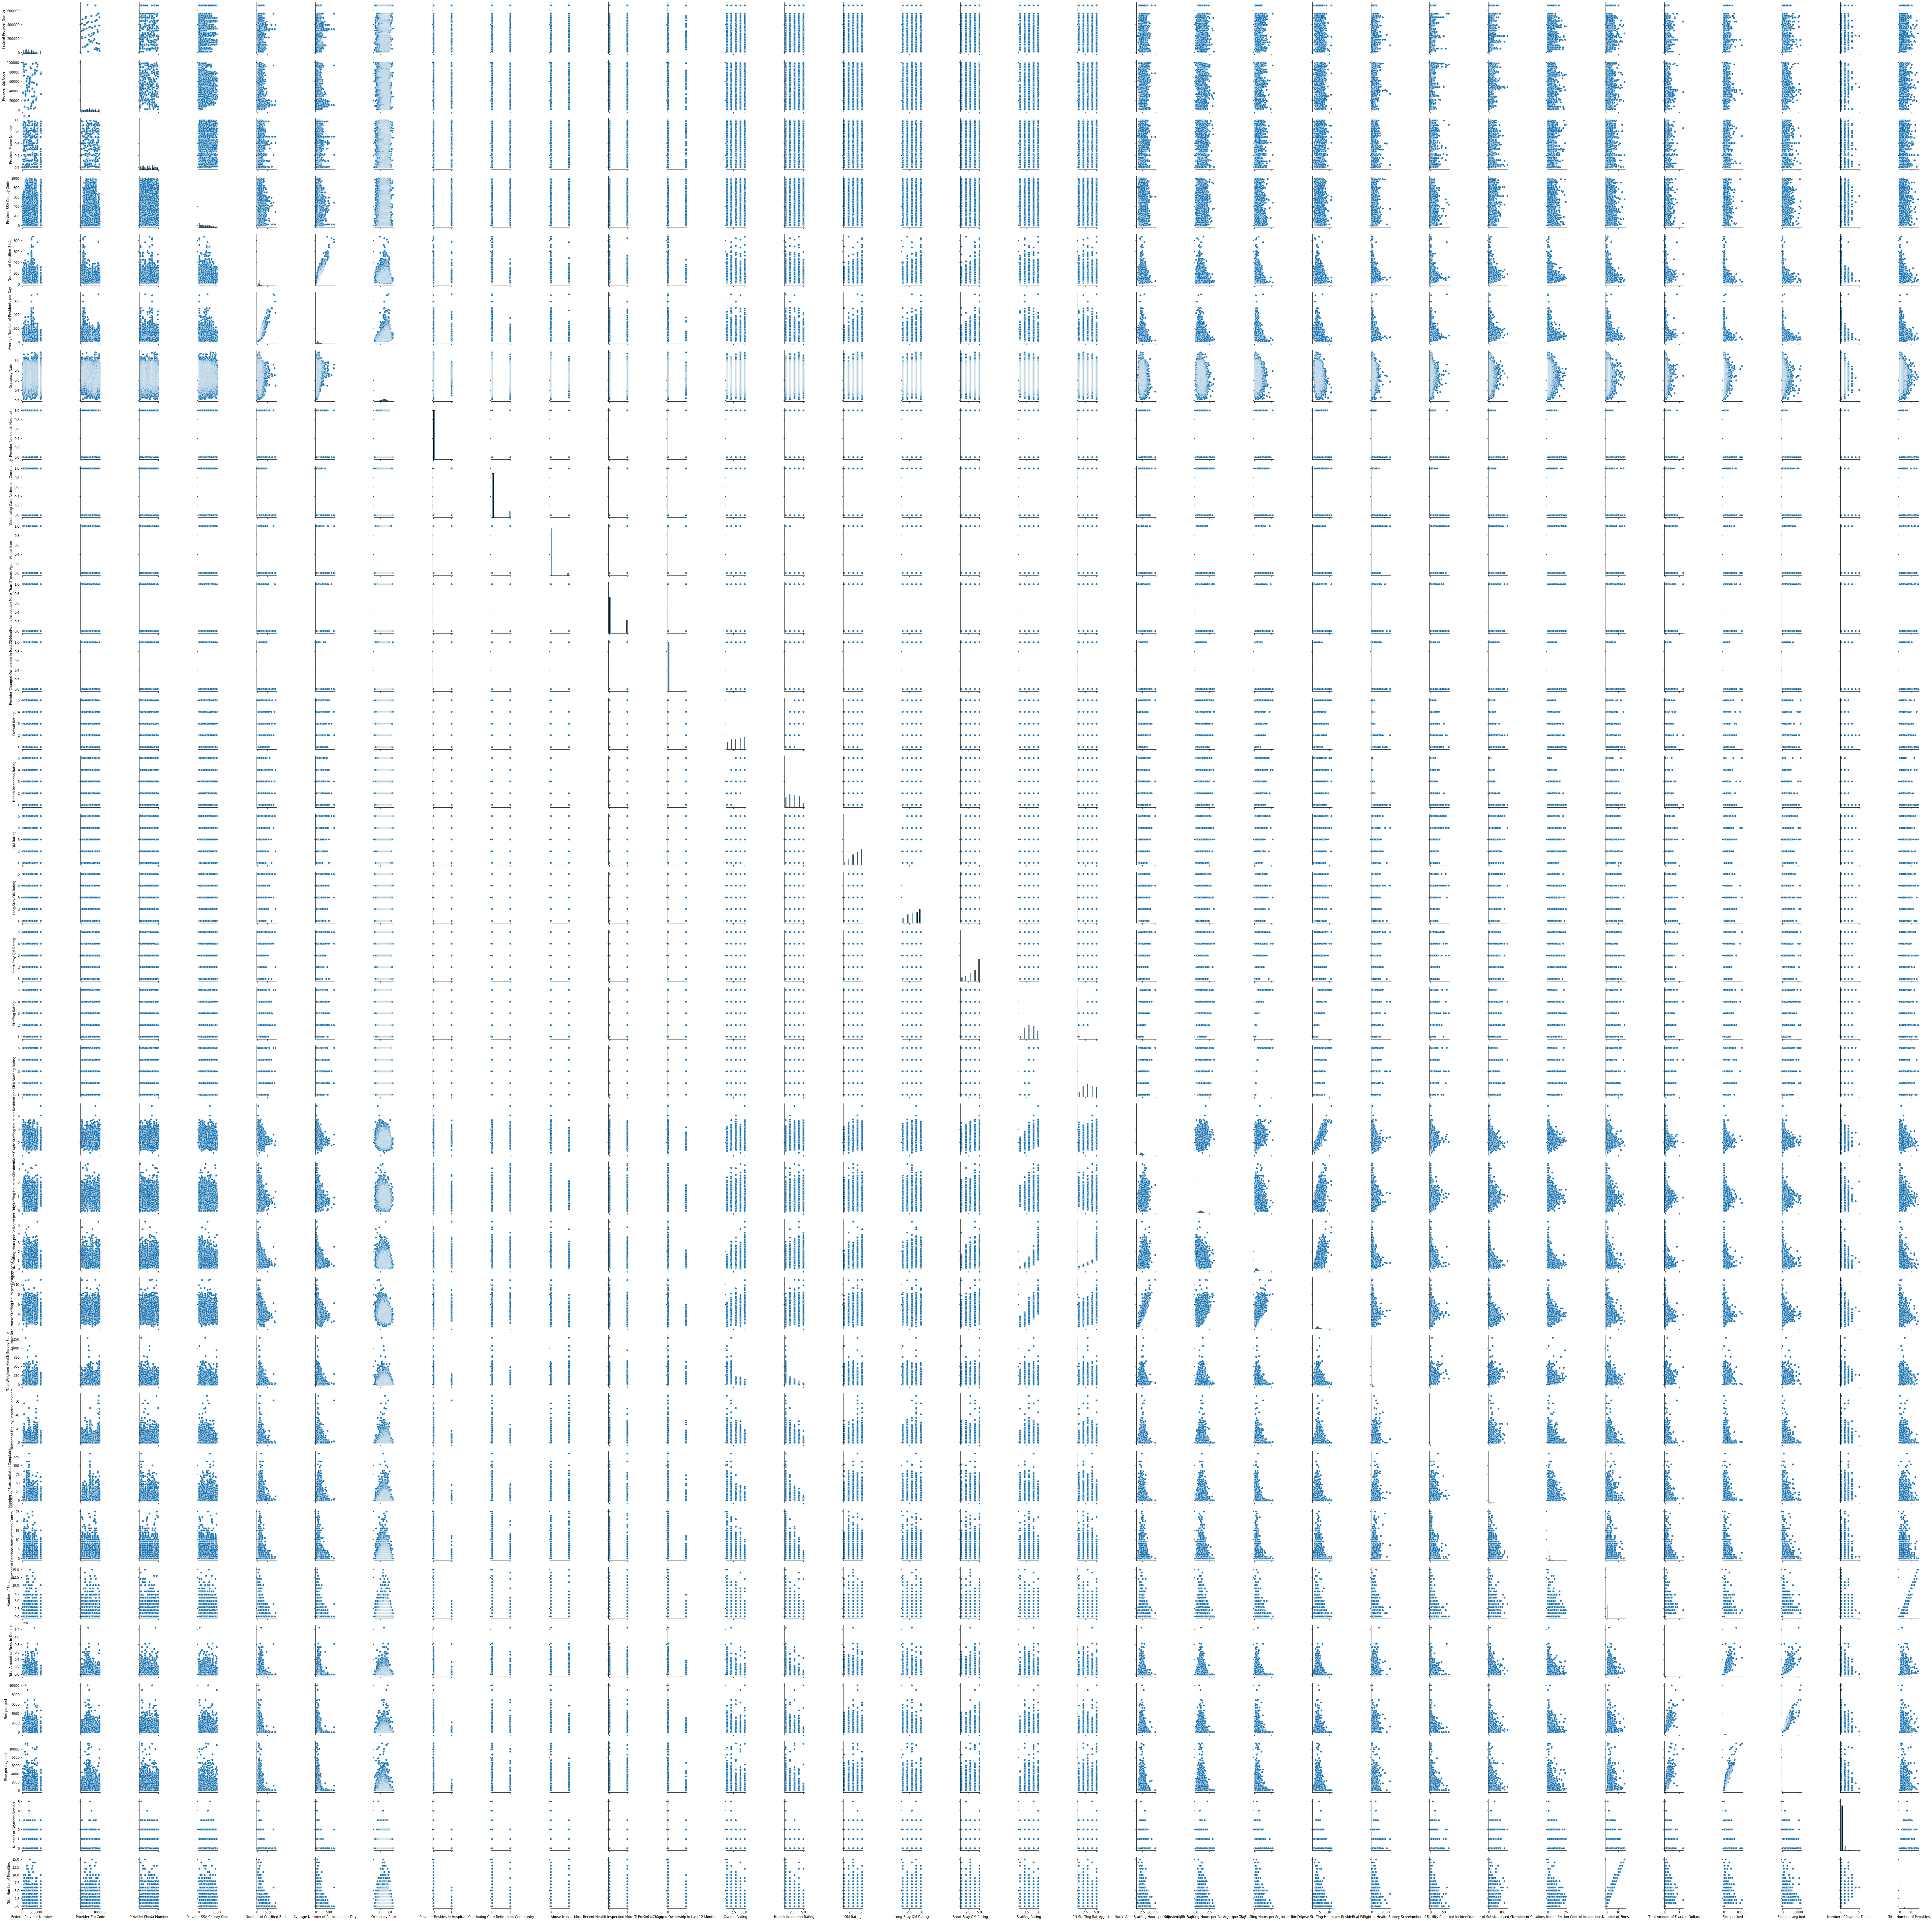

In [51]:
sns.pairplot(df)

In [74]:
df.corr()

Index  \
Index                                               1.000000   
Federal Provider Number                             0.061058   
Provider Zip Code                                   0.184850   
Provider Phone Number                               0.023461   
Provider SSA County Code                            0.062533   
Number of Certified Beds                            0.059090   
Average Number of Residents per Day                -0.310263   
Occupancy Rate                                     -0.980707   
State Avg                                          -0.378171   
OccupancyRate-Avg State                            -0.904892   
Provider Resides in Hospital                       -0.024631   
Continuing Care Retirement Community                0.002880   
Abuse Icon                                          0.014198   
Most Recent Health Inspection More Than 2 Years... -0.014842   
Provider Changed Ownership in Last 12 Months        0.035403   
Overall Rating                                     -0.059903   
Health Inspection Rating                           -0.052129   
QM Rating                                          -0.124545   
Long-Stay QM Rating                                -0.143692   
Short-Stay QM Rating                               -0.067792   
Staffing Rating                                     0.051049   
RN Staffing Rating                                  0.021734   
Adjusted Nurse Aide Staffing Hours per Resident...  0.078415   
Adjusted LPN Staffing Hours per Resident per Day    0.145646   
Adjusted RN Staffing Hours per Resident per Day     0.051281   
Adjusted Total Nurse Staffing Hours per Residen...  0.137354   
Total Weighted Health Survey Score                  0.087350   
Number of Facility Reported Incidents               0.014060   
Number of Substantiated Complaints                  0.038373   
Number of Citations from Infection Control Insp...  0.056837   
Number of Fines                                     0.060681   
Total Amount of Fines in Dollars                    0.043079   
Fine per bed                                        0.020992   
Fine per avg bed                                    0.103493   
Number of Payment Denials                           0.084601   
Total Number of Penalties                           0.077105   
Average of Fine per bed-state                       0.023088   
Fine-StateAvg                                       0.016003   
Longitude                                          -0.108866   
Latitude                                            0.019295   
Percent Vaccinated Residents                       -0.001607   
Percent Vaccinated Healthcare Personnel            -0.022743   

                                                    Federal Provider Number  \
Index                                                              0.061058   
Federal Provider Number                                            1.000000   
Provider Zip Code                                                  0.091590   
Provider Phone Number                                              0.083111   
Provider SSA County Code                                           0.149184   
Number of Certified Beds                                          -0.006681   
Average Number of Residents per Day                               -0.031403   
Occupancy Rate                                                    -0.057383   
State Avg                                                         -0.168846   
OccupancyRate-Avg State                                            0.007059   
Provider Resides in Hospital                                       0.007361   
Continuing Care Retirement Community                               0.019863   
Abuse Icon                                                        -0.023708   
Most Recent Health Inspection More Than 2 Years...                 0.019404   
Provider Changed Ownership in Last 12 Months                       0.018326   
Overall Rating                        

In [202]:
df.corr()[['Occupancy Rate','OccupancyRate-Avg State','Fine per bed','Adjusted Total Nurse Staffing Hours per Resident per Day']]

Occupancy Rate  \
Index                                                    -0.980707   
Federal Provider Number                                  -0.057383   
Provider Zip Code                                        -0.186220   
Provider Phone Number                                    -0.020562   
Provider SSA County Code                                 -0.058088   
Number of Certified Beds                                 -0.064543   
Average Number of Residents per Day                       0.313125   
Occupancy Rate                                            1.000000   
Occupancy-Average                                         1.000000   
State Avg                                                 0.378549   
OccupancyRate-Avg State                                   0.925581   
Provider Resides in Hospital                              0.022428   
Year                                                     -0.051020   
Continuing Care Retirement Community                     -0.005479   
Abuse Icon                                               -0.011833   
Most Recent Health Inspection More Than 2 Years...        0.014798   
Provider Changed Ownership in Last 12 Months             -0.035353   
Overall Rating                                            0.056886   
Health Inspection Rating                                  0.050199   
QM Rating                                                 0.123886   
Long-Stay QM Rating                                       0.143802   
Short-Stay QM Rating                                      0.066909   
Staffing Rating                                          -0.053536   
RN Staffing Rating                                       -0.023139   
Adjusted Nurse Aide Staffing Hours per Resident...       -0.084196   
Adjusted LPN Staffing Hours per Resident per Day         -0.147842   
Adjusted RN Staffing Hours per Resident per Day          -0.052859   
Adjusted Total Nurse Staffing Hours per Residen...       -0.142912   
Adjusted Total Nurse Staffing Hours per Bed per...        0.646790   
Total Weighted Health Survey Score                       -0.085505   
Number of Facility Reported Incidents                    -0.010000   
Number of Substantiated Complaints                       -0.035048   
Number of Citations from Infection Control Insp...       -0.056376   
Number of Fines                                          -0.059998   
Total Amount of Fines in Dollars                         -0.043864   
Fine per bed                                             -0.018671   
Fine per avg bed                                         -0.108073   
Number of Payment Denials                                -0.083356   
Total Number of Penalties                                -0.076159   
Average of Fine per bed-state                            -0.020168   
Fine-StateAvg                                            -0.014327   
Longitude                                                 0.111573   
Latitude                                                 -0.016631   
Percent Vaccinated Residents                              0.004681   
Percent Vaccinated Healthcare Personnel                   0.024532   
Age                                                       0.051020   

                                                    OccupancyRate-Avg State  \
Index                                                         -9.048919e-01   
Federal Provider Number                                        7.059161e-03   
Provider Zip Code                                             -1.251883e-03   
Provider Phone Number                                         -1.144593e-02   
Provider SSA County Code                                      -6.337275e-03   
Number of Certified Beds                                      -1.106421e-01   
Average Number of Residents per Day                            2.368161e-01   
Occupancy Rate                                                 9.255811e-01   
Occupancy-Average                                 

In [204]:
df_train, df_test = train_test_split(df, test_size=.2, random_state=18)

In [205]:
model = sm.OLS(df_train['Occupancy Rate'],sm.add_constant(df_train[['State Avg', "Number of Certified Beds","Year","Health Inspection Rating","QM Rating"]]))
model.fit().summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Occupancy Rate   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     375.0
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:27:10   Log-Likelihood:                 5701.5
No. Observations:                9320   AIC:                        -1.139e+04
Df Residuals:                    9314   BIC:                        -1.135e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.3314      0.239     -5.579      0.000      -1.799      -0.864
State Avg                    1.0586      0.026     40.230      0.000       1.007       1.110
Number of Certified Beds    -0.0002   2.42e-05     -9.000      0.000      -0.000      -0.000
Year                         0.0006      0.000      5.483      0.000       0.000       0.001
Health Inspection Rating     0.0021      0.001      1.837      0.066      -0.000       0.004
QM Rating                    0.0100      0.001      8.525      0.000       0.008       0.012
==============================================================================
Omnibus:                       40.490   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.218
Skew:                          -0.140   Prob(JB):                     6.80e-10
Kurtosis:                       3.173   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
lm = LinearRegression()
y = df_train['Occupancy Rate']
X = df_train[['State Avg', "Number of Certified Beds","Year","Health Inspection Rating","QM Rating"]]
lm.fit(X,y)
mean_absolute_error(y, lm.predict(X))

0.10469851334549449

In [208]:
lm.predict(X)

array([0.70191901, 0.72217601, 0.58026689, ..., 0.76934036, 0.60701067,
       0.57644858])

In [209]:
r2_score(y, lm.predict(X))

0.16758978392508816

In [210]:
lm = LinearRegression()
y = df_train['Occupancy Rate']
X = df_train[['State Avg', "Number of Certified Beds","Year","Total Weighted Health Survey Score",
        "Long-Stay QM Rating","Adjusted Total Nurse Staffing Hours per Resident per Day", 
        ]]
lm.fit(X,y)
mean_absolute_error(y, lm.predict(X))

0.10132908253560775

In [211]:
r2_score(y, lm.predict(X))

0.21746702675691976

In [212]:
lm = LinearRegression()
y = df_train['OccupancyRate-Avg State']
X = df_train[["Number of Certified Beds","Year","Total Weighted Health Survey Score",
        "Long-Stay QM Rating","Adjusted Total Nurse Staffing Hours per Resident per Day"]]
lm.fit(X,y)
mean_absolute_error(y, lm.predict(X))

0.10159285255845162

In [213]:
r2_score(y, lm.predict(X))

0.081766690332704

In [214]:
model = sm.OLS(df_train['Occupancy Rate'],sm.add_constant(df_train[['State Avg', "Number of Certified Beds","Year","Health Inspection Rating","Long-Stay QM Rating"]]))
model.fit().summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Occupancy Rate   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     389.9
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:27:57   Log-Likelihood:                 5732.3
No. Observations:                9320   AIC:                        -1.145e+04
Df Residuals:                    9314   BIC:                        -1.141e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.3799      0.238     -5.803      0.000      -1.846      -0.914
State Avg                    1.0596      0.026     40.462      0.000       1.008       1.111
Number of Certified Beds    -0.0002   2.42e-05     -9.363      0.000      -0.000      -0.000
Year                         0.0007      0.000      5.698      0.000       0.000       0.001
Health Inspection Rating     0.0019      0.001      1.708      0.088      -0.000       0.004
Long-Stay QM Rating          0.0120      0.001     11.610      0.000       0.010       0.014
==============================================================================
Omnibus:                       41.201   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.871
Skew:                          -0.143   Prob(JB):                     4.90e-10
Kurtosis:                       3.170   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
lm = LinearRegression()
lm.fit(np.array(df_train['Index']).reshape(-1, 1), df_train['OccupancyRate-Avg State'])

LinearRegression()

In [100]:
lm = LinearRegression()
y = df_train['Occupancy Rate']
rs2 = []
for x in df_train.corr().columns:
    lm.fit(np.array(df[x]).reshape(-1, 1), y)
    s = lm.score(np.array(df[x]).reshape(-1, 1), y)
    rs2.append((x,s))
rs2

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [101]:
rs2

[('Index', 0.9617867340575088),
 ('Federal Provider Number', 0.0032927851785149453),
 ('Provider Zip Code', 0.0346780312337821),
 ('Provider Phone Number', 0.00042279034363801316),
 ('Provider SSA County Code', 0.0033741932640335426),
 ('Number of Certified Beds', 0.00416577210685265),
 ('Average Number of Residents per Day', 0.09804735108393958),
 ('Occupancy Rate', 1.0),
 ('State Avg', 0.14329960777944406),
 ('OccupancyRate-Avg State', 0.8567003922205553),
 ('Provider Resides in Hospital', 0.000503015068318402),
 ('Continuing Care Retirement Community', 3.0024235975534275e-05),
 ('Abuse Icon', 0.00014002572289295578),
 ('Most Recent Health Inspection More Than 2 Years Ago',
  0.00021897494200673329),
 ('Provider Changed Ownership in Last 12 Months', 0.0012498369847893098),
 ('Overall Rating', 0.0032360541961184985),
 ('Health Inspection Rating', 0.0025199199037673203),
 ('QM Rating', 0.015347668279045767),
 ('Long-Stay QM Rating', 0.02067898898491838),
 ('Short-Stay QM Rating', 0.004

In [215]:
model = sm.OLS(df_train['OccupancyRate-Avg State'],sm.add_constant(df_train[["Number of Certified Beds",'Fine per bed','Provider Changed Ownership in Last 12 Months',"Health Inspection Rating","Long-Stay QM Rating",'Short-Stay QM Rating',"Staffing Rating"]]))
model.fit().summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     OccupancyRate-Avg State   R-squared:                       0.057
Model:                                 OLS   Adj. R-squared:                  0.056
Method:                      Least Squares   F-statistic:                     79.90
Date:                     Tue, 12 Oct 2021   Prob (F-statistic):          3.88e-113
Time:                             22:28:19   Log-Likelihood:                 5856.5
No. Observations:                     9320   AIC:                        -1.170e+04
Df Residuals:                         9312   BIC:                        -1.164e+04
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0378      0.007      5.328      0.000       0.024       0.052
Number of Certified Beds                        -0.0003   2.37e-05    -13.506      0.000      -0.000      -0.000
Fine per bed                                   2.84e-06   2.91e-06      0.977      0.328   -2.86e-06    8.53e-06
Provider Changed Ownership in Last 12 Months    -0.0255      0.011     -2.315      0.021      -0.047      -0.004
Health Inspection Rating                         0.0053      0.001      4.484      0.000       0.003       0.008
Long-Stay QM Rating                              0.0120      0.001     11.273      0.000       0.010       0.014
Short-Stay QM Rating                             0.0029      0.001      2.546      0.011       0.001       0.005
Staffing Rating                                 -0.0208      0.001    -16.725      0.000      -0.023      -0.018
==============================================================================
Omnibus:                       36.125   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.474
Skew:                          -0.149   Prob(JB):                     1.20e-08
Kurtosis:                       3.073   Cond. No.                     4.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
model = sm.OLS(df_train['Fine per bed'],sm.add_constant(df_train[["Number of Certified Beds","Occupancy Rate","Abuse Icon","Total Weighted Health Survey Score","Health Inspection Rating","QM Rating","Staffing Rating","RN Staffing Rating"]]))
model.fit().summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Fine per bed   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     207.0
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          4.94e-324
Time:                        22:28:36   Log-Likelihood:                -70072.
No. Observations:                9320   AIC:                         1.402e+05
Df Residuals:                    9311   BIC:                         1.402e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                179.4298     36.226      4.953      0.000     108.420     250.440
Number of Certified Beds              -0.6100      0.082     -7.448      0.000      -0.771      -0.449
Occupancy Rate                        67.9946     32.729      2.077      0.038       3.838     132.151
Abuse Icon                            55.1499     23.050      2.393      0.017       9.966     100.334
Total Weighted Health Survey Score     2.3027      0.097     23.655      0.000       2.112       2.494
Health Inspection Rating             -32.3425      5.128     -6.307      0.000     -42.395     -22.290
QM Rating                            -22.1070      4.044     -5.467      0.000     -30.033     -14.181
Staffing Rating                      -13.4374      9.705     -1.385      0.166     -32.462       5.587
RN Staffing Rating                    24.9811      8.716      2.866      0.004       7.895      42.067
==============================================================================
Omnibus:                    11726.184   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2824506.482
Skew:                           6.753   Prob(JB):                         0.00
Kurtosis:                      87.208   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
model = sm.OLS(df_train["Fine per bed"],sm.add_constant(df_train[["Health Inspection Rating","Long-Stay QM Rating","Short-Stay QM Rating","Staffing Rating","RN Staffing Rating"]]))
model.fit().summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Fine per bed   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          6.76e-183
Time:                        22:28:45   Log-Likelihood:                -70406.
No. Observations:                9320   AIC:                         1.408e+05
Df Residuals:                    9314   BIC:                         1.409e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      501.6545     20.828     24.085      0.000     460.826     542.483
Health Inspection Rating  -111.3810      3.992    -27.899      0.000    -119.207    -103.555
Long-Stay QM Rating        -19.5794      3.797     -5.156      0.000     -27.023     -12.136
Short-Stay QM Rating        -3.3197      4.077     -0.814      0.415     -11.311       4.671
Staffing Rating              1.2168      9.992      0.122      0.903     -18.370      20.804
RN Staffing Rating          16.2838      9.024      1.804      0.071      -1.406      33.973
==============================================================================
Omnibus:                    11737.032   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2517208.592
Skew:                           6.820   Prob(JB):                         0.00
Kurtosis:                      82.348   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""